<a href="https://colab.research.google.com/github/saulekristers/mlh-hackathon-boilerplate/blob/gh-pages/midtermkristers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. What is the time algorithmic complexity of the following recurrence? Use appropriate notation in your answer.**

T(n) = 36T(n/6) + n^2 * log n  (note: n^2 == n*n )

In [ ]:
T(n) = 36T(n/6) + n^2 * log n  (note: n^2 == n*n )

Using master theorem, it looks like the case 2 (comparing f(n) with a logoritm)

In this case, a = 36, b=6. Using the logb^a, the result is 2, which needs to be put as a exponent to n, meaning that the result is n^2. 
Therefore, the Big Theta = n^2*log^0(n). 
As the k =0, the answer is n^2 * log n


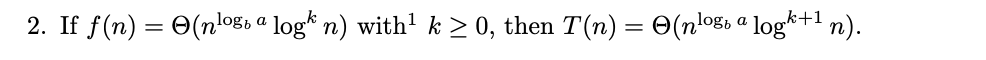

**2. Middle friendly person. You are working at a social network called FriendFace. This network is quite a small one, only 15 persons and 21 bi-directional relationships as defined in file friend_face.csv**

Your co-worker Roy wants you to find the average person on this network and their total friendship_score. Average person here means the one with the median(middle) person scored by their total friendship score. 

Total friendship score means total friendship_weigth score summed across all their friends. 

Example of 3 persons and 2 relationships.
Alice,Bob 0.8
Bob, Carol 0.7

In this case Alice has a friendship Score of 0.8, Bob has a friendship score of 0.7+0.8 = 1.5  and Carol has a friendship score of 0.7. Thus the middle person here is Alice since her score is right in the middle  of 0.7, 0.8, 1.5

Write an algorithm, determine its time complexity and find the answer to Roy's question.

In [ ]:
import pandas as pd
import statistics 

df = pd.read_csv(r'/content/friend_face.csv')
print(df)

   user1_name user2_name  friendship_weight
0       Alice        Bob                0.9
1       Alice    Charlie                0.8
2       Alice      David                0.6
3         Bob    Charlie                0.7
4         Bob        Eve                0.9
5         Bob      Frank                0.8
6     Charlie      David                0.5
7     Charlie     George                0.6
8       David      Harry                0.7
9         Eve      Frank                0.8
10        Eve     George                0.9
11      Frank      Isaac                0.7
12     George       Jack                0.8
13      Harry      Isaac                0.6
14      Harry       Kate                0.9
15      Isaac      Laura                0.8
16       Jack       Kate                0.7
17       Kate      Laura                0.5
18       Kate       Mike                0.9
19      Laura     Nathan                0.8
20     Nathan       Olga                0.7


In [ ]:
#my first thought was... this seems like the problem with the two-sum problem. 
# i firstly need to calculate the individual friend score
# then i need to sort it
# then i need to find the median

#before doing it, my first thought was, okay, brute force, i would probably just go and create a dictionary - word & score. 
# the problem with that is the time complexity regarding the search and insertion of the list (O(n)), 
   #however, the hash table works wonders as the search and insertion is O(1). 

In [ ]:
# create an empty dictionary to store friendship scores
hash_table = {}

# iterate through the DataFrame rows to populate the hash table
for i, row in df.iterrows():
  # extract the user1, user2, and weight from the row
  user1, user2, weight = row
  
  # if the user1 is not in the friendship_scores dictionary, add it with a value of 0
  if user1 not in hash_table:
    hash_table[user1] = 0
    
  # if the user2 is not in the friendship_scores dictionary, add it with a value of 0
  if user2 not in hash_table:
    hash_table[user2] = 0
    
  # add the weight to the friendship score of user1 and user2
  hash_table[user1] += weight
  hash_table[user2] += weight

# sort the friendship scores in ascending order
sorted_scores= sorted(hash_table.values()) # Python uses TimSort which has a best case time complexity of O(n log n)

# calculate the mean of the sorted scores
mean = statistics.mean(sorted_scores) # the mean() method has a time complexity of O(n)

# find the friendship score that is closest to the mean
closest_to_mean = min(sorted_scores, key=lambda x: abs(x - mean)) # this is a linear search with a time complexity of O(n)

# find the person with the friendship score that is closest to the mean
keys = [k for k, v in hash_table.items() if v == closest_to_mean]
print("The median person is", keys)
print("With a friendship score of", closest_to_mean)



The median person is ['Isaac']
With a friendship score of 2.0999999999999996


Time complexity of this algorithm = O(n log n), because of Python's TimSort when sorting the friendship scores. 
The calculations of the mean and finding the closest friendship score are linear searches with a time complexity of O(n).

I believe that the sorting algorithm even with larger data sets would work okay, I believe that mean and finding the key could be done faster, by example divide and concqer method (stoping when it does not make sense to go further)

I used chatgpt for finding a more simple closest_to_mean function, because previously I hardcoded it, but i understood that it would not work when enlarging the data set

**3. Your co-worker Moss wants you to find the diameter of the same social network.**

https://mathworld.wolfram.com/GraphDiameter.html

Just like previous task we consider the weight in calculating this score.

Write an algorithm for finding the diameter. You are allowed to use existing graph algorithms.

1. Initialize the diameter to be 0.
2. For each vertex in the graph, compute the shortest path from that vertex to every other vertex, using a shortest-path algorithm like 3. Dijkstra's algorithm or Floyd-Warshall algorithm.
4. For each shortest path found in step 2, record its length.
5. Compute the maximum length of all recorded shortest paths.
6. Set the diameter to be the maximum length found in step 4.
7. If the graph is disconnected, set the diameter to infinity.
8. Return the diameter.


